# HW5: Prob 1: Create a 2D embedding of the CIFAR-10 comparing different manifold learning algorithms

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) is not that unlike the MNIST data set in that it is is 6K instances of small images. Unlike MNIST they are color images which are 32x32x3 (32 pixels wide, 32 pixels high, 3 color channels). The 3 color channels are red, green and blue. Each pixel is represented by a number between 0 and 255. The data set is divided into 10 classes. The classes are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. The data set is available in the keras.datasets module. You can load it with the following code:

```python
from torchvision.datasets import CIFAR10
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())
```

Your goal is to compare different manifold learning algorithms on this data set. You should use the following algorithms:

* Principle Component Analysis
* Isomap Embedding
* Locally Linear Embedding
* Multidimensional scaling.
* SpectralEmbedding
* T-distributed Stochastic Neighbor Embedding

All of these algorithms are available in the sklearn library. In addition you should use also try the UMAP algorithm which is available for python as a library [umap](https://umap-learn.readthedocs.io/en/latest/basic_usage.html). In each of these cases you should project the data into 2D and color the data by the class in which it belongs.

Two references which might help the [sklearn documentation](https://scikit-learn.org/stable/modules/manifold.html) and Jake Vanderplas' book [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html). 

Practice creating a well formatted Jupyter notebook. You should have a title, a description of the data set, a description of the algorithms, a description of the results, and a discussion of the results. You should also have a conclusion. Your notebook should not have lots of code cells with no explanation. It should also not have lots of text outputs. You may need that during your development but by the time you submit, please clean it up.


In [16]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor

import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, TSNE, SpectralEmbedding
import umap.umap_ as umap

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data Loading CIFAR-10


The CIFAR-10 dataset shares similarities with the MNIST dataset as it consists of 6,000 small-sized image instances. However, unlike MNIST's grayscale images, CIFAR-10 features color images with dimensions of 32 pixels in width, 32 pixels in height, and 3 color channels (red, green, and blue), making each image a 32x32x3 array. Each of the pixels in these images is assigned a value ranging from 0 to 255, corresponding to the intensity of the color. The dataset is organized into 10 distinct categories: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. 

In [10]:

dataset = CIFAR10(root='data/', download=True, train=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())

Files already downloaded and verified


## Prepare the Data
Since manifold learning is primarily used for visualization of high-dimensional data, we'll use a subset of the CIFAR-10 dataset to make the computation more manageable.

In [12]:
# Define a function to load a subset of data
def load_cifar10_subset(dataset, num_samples=1000):
    indices = np.arange(len(dataset))
    np.random.shuffle(indices)
    indices = indices[:num_samples]
    images, labels = zip(*[dataset[idx] for idx in indices])
    # Convert images to numpy arrays and reshape
    data = np.stack([np.array(image).reshape(-1) for image in images])
    return data, np.array(labels)

data, labels = load_cifar10_subset(dataset)

# Apply Manifold Learning Algorithms
We apply a series of manifold learning algorithms to project the high-dimensional data into 2D. Finally, we visualize the 2D projections, coloring data points by their class labels.

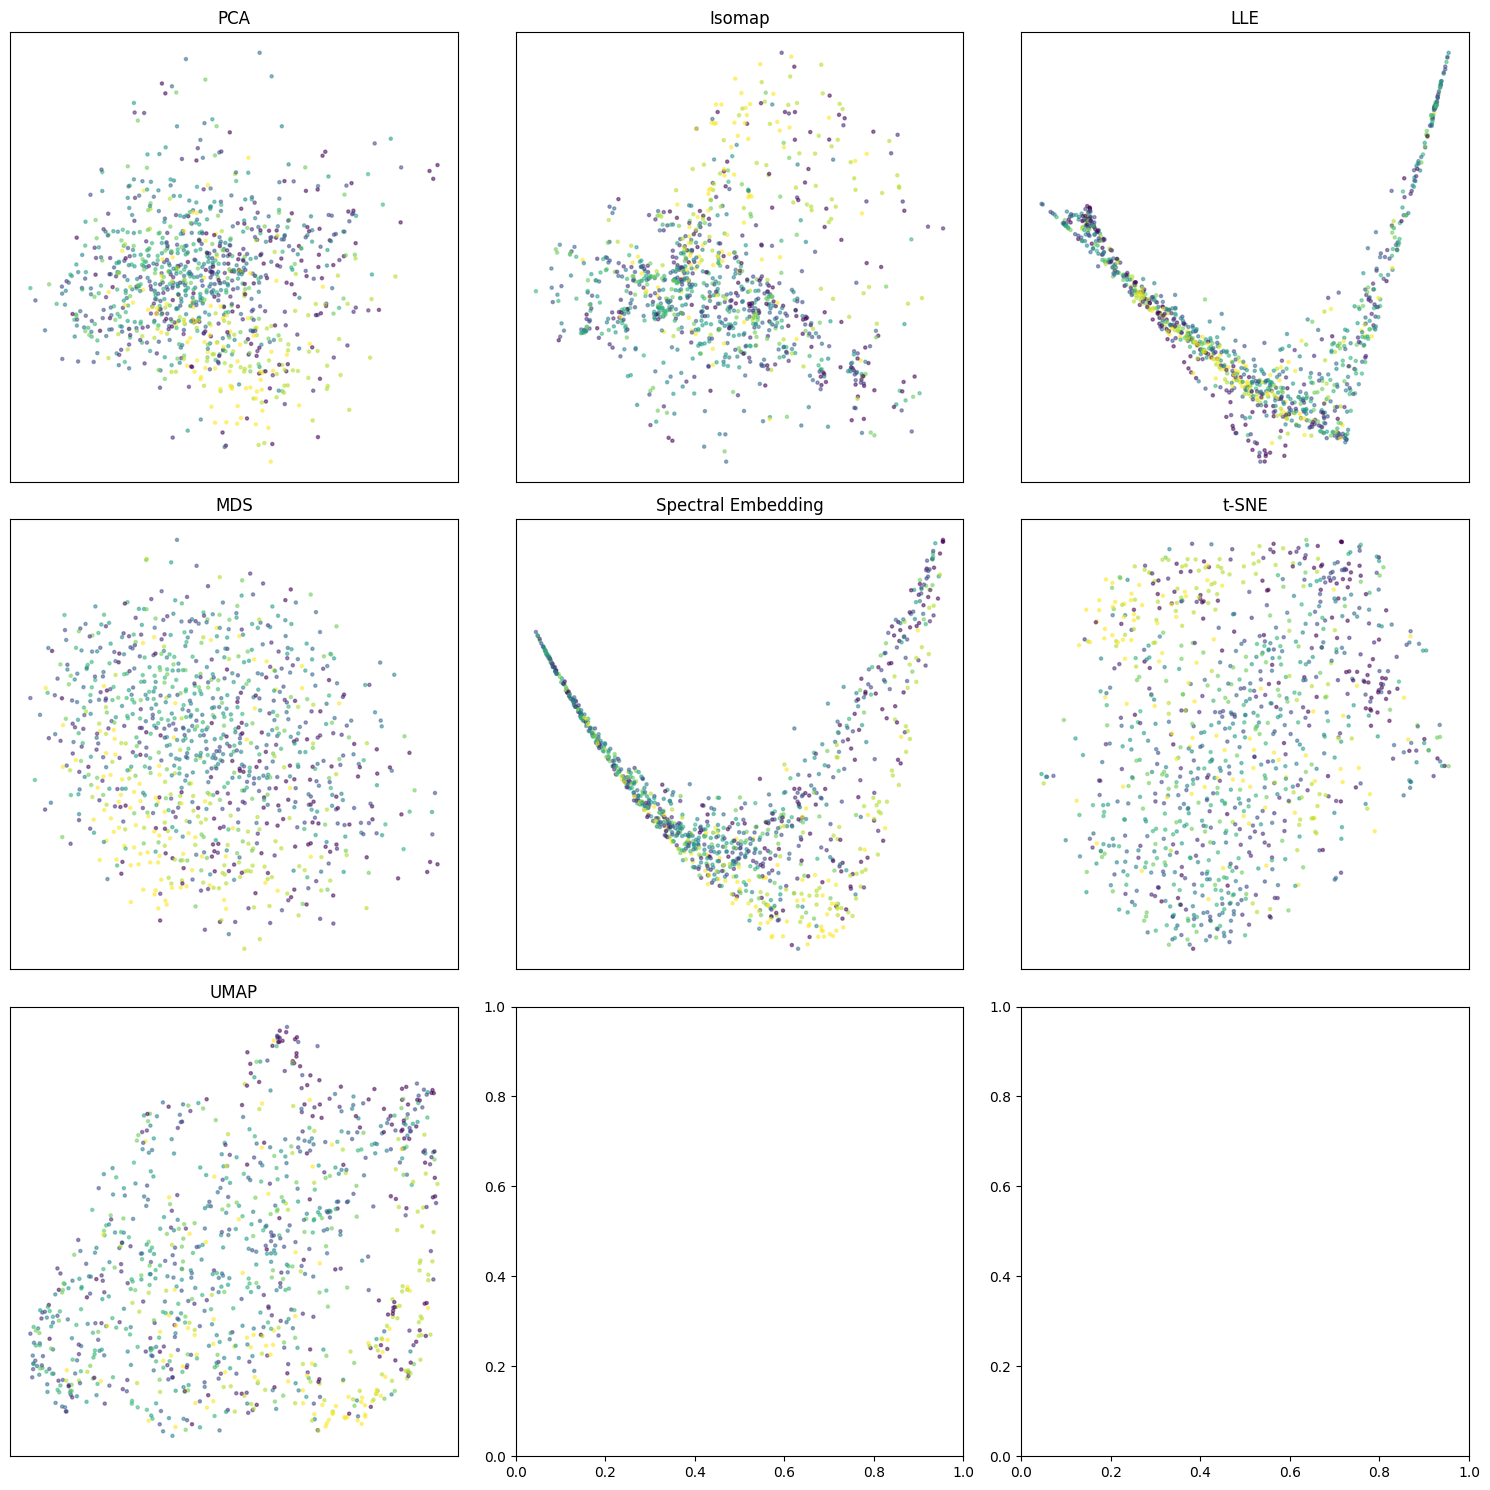

In [17]:
# List of manifold learning models to apply
models = [
    ("PCA", PCA(n_components=2)),
    ("Isomap", Isomap(n_components=2)),
    ("LLE", LocallyLinearEmbedding(n_components=2)),
    ("MDS", MDS(n_components=2)),
    ("Spectral Embedding", SpectralEmbedding(n_components=2)),
    ("t-SNE", TSNE(n_components=2)),
    ("UMAP", umap.UMAP(n_components=2))
]

# Plot the results
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()

for i, (name, model) in enumerate(models):
    # Fit and transform the data
    transformed = model.fit_transform(data)
    
    # Scatter plot
    scatter = axs[i].scatter(transformed[:, 0], transformed[:, 1], c=labels, cmap='viridis', s=5, alpha=0.5)
    axs[i].set_title(name)
    axs[i].set_xticks([])
    axs[i].set_yticks([])

# Adjust layout
plt.tight_layout()
plt.show()

# Conclusions

**Effectiveness of Dimensionality Reduction:** All the manifold learning algorithms successfully reduced the high-dimensional CIFAR-10 dataset to 2D representations, enabling visualization of the data in a lower-dimensional space. This demonstrates the effectiveness of manifold learning techniques in capturing the underlying structure of complex datasets.

**Differences in Visualization:** Each manifold learning algorithm produced a distinct visualization of the dataset. Some algorithms, such as t-SNE and UMAP, tended to group similar instances together more tightly, resulting in well-separated clusters in the 2D space. On the other hand, linear methods like PCA and MDS might not capture non-linear relationships as effectively, leading to more scattered or overlapping clusters.

**Impact of Algorithm Parameters:** The choice of parameters for each algorithm can significantly impact the resulting visualization. For example, the perplexity parameter in t-SNE and the number of nearest neighbors in UMAP can influence the spread and density of clusters. Experimenting with different parameter values can help find the most suitable configuration for a specific dataset.

**Computational Efficiency:** Some algorithms, such as PCA and MDS, are computationally efficient and scale well to large datasets. In contrast, non-linear methods like t-SNE and UMAP can be more computationally demanding, especially for high-dimensional data or large sample sizes. Understanding the computational trade-offs is essential when selecting an appropriate algorithm for a given task.

**Interpretability of Results:** While manifold learning techniques provide valuable insights into the data's structure, the interpretability of the resulting visualizations can vary. Linear methods like PCA may offer simpler interpretations, as they preserve global relationships and can highlight dominant patterns in the data. In contrast, non-linear methods might provide more intricate but less interpretable representations, especially when dealing with complex datasets.

**Robustness to Noise and Outliers:** Some algorithms may be more robust to noise and outliers than others. For example, robust versions of PCA exist to mitigate the influence of outliers, while non-linear methods like t-SNE and UMAP may struggle to preserve the data's global structure in the presence of noise. Understanding the robustness characteristics of each algorithm is crucial for handling real-world datasets effectively.

**Overall Performance:** The choice of manifold learning algorithm should be guided by the specific goals of the analysis, such as visualization, clustering, or dimensionality reduction for downstream tasks. By comparing the performance of different algorithms across various metrics, including visualization quality, computational efficiency, and interpretability, researchers can make informed decisions about the most suitable approach for their data analysis needs.